# RNN for Quadratic Equation 2x² + 11x + 12 = 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(155)

In [2]:
class RNN:
    def __init__(self, hidden_size=64, learning_rate=0.001):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        
        # Initialize weights with Xavier/Glorot initialization
        self.Wxh = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / 1)
        self.Whh = np.random.randn(hidden_size, hidden_size) * np.sqrt(2.0 / hidden_size)
        self.Why = np.random.randn(1, hidden_size) * np.sqrt(2.0 / hidden_size)
        
        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((1, 1))
        
        # Training history
        self.loss_history = []
    
    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2
    
    def forward_pass(self, x_input, h_prev):
        # Hidden state computation
        z = np.dot(self.Wxh, x_input) + np.dot(self.Whh, h_prev) + self.bh
        h_curr = np.tanh(z)
        
        # Output computation
        y_pred = np.dot(self.Why, h_curr) + self.by
        
        return y_pred, h_curr, z
    
    def train(self, x_data, y_data, epochs=1000):
        print(" Training Clean RNN on Quadratic Equation 2x² + 11x + 12 = 0")
        print(f"Training data: {len(x_data)} points from x={x_data[0]:.1f} to x={x_data[-1]:.1f}")
        
        for epoch in range(epochs):
            total_loss = 0
            h_prev = np.zeros((self.hidden_size, 1))
            
            for i in range(len(x_data)): 
                x_input = np.array([[x_data[i]]])
                y_target = np.array([[y_data[i]]])
                
                # Forward pass
                y_pred, h_curr, z = self.forward_pass(x_input, h_prev)
                
                # Calculate loss
                loss = 0.5 * (y_target - y_pred) ** 2
                total_loss += loss[0, 0]
                
                # Backpropagation
                dy = -(y_target - y_pred)
                dWhy = np.dot(dy, h_curr.T)
                dby = dy
                
                dh = np.dot(self.Why.T, dy)
                dh_raw = dh * self.tanh_derivative(h_curr)
                
                dWxh = np.dot(dh_raw, x_input.T)
                dWhh = np.dot(dh_raw, h_prev.T)
                dbh = dh_raw
                
                # Gradient clipping
                max_grad = 5.0
                dWhy = np.clip(dWhy, -max_grad, max_grad)
                dWxh = np.clip(dWxh, -max_grad, max_grad)
                dWhh = np.clip(dWhh, -max_grad, max_grad)
                dbh = np.clip(dbh, -max_grad, max_grad)
                dby = np.clip(dby, -max_grad, max_grad)
                
                # Update weights
                self.Why -= self.learning_rate * dWhy
                self.by -= self.learning_rate * dby
                self.Wxh -= self.learning_rate * dWxh
                self.Whh -= self.learning_rate * dWhh
                self.bh -= self.learning_rate * dbh
                
                h_prev = h_curr.copy()
            
            avg_loss = total_loss / len(x_data)
            self.loss_history.append(avg_loss)
            
            # Progress reporting every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch:4d}: Loss = {avg_loss:.10f}")
                
            # Adaptive learning rate AFTER printing (to avoid interference)
            if epoch > 0 and epoch % 1000 == 0:
                self.learning_rate *= 0.95
        
        # Completion message
        final_loss = self.loss_history[-1]
        print(f" Training completed! Final loss: {final_loss:.10f}")
        return final_loss
    
    def predict(self, x_values):
        predictions = []
        h_prev = np.zeros((self.hidden_size, 1))
        
        for x in x_values:
            x_input = np.array([[x]])
            y_pred, h_curr, _ = self.forward_pass(x_input, h_prev)
            predictions.append(y_pred[0, 0])
            h_prev = h_curr.copy()
        
        return predictions
    
    def predict_future(self, seed_x_values, future_x_values):
        h_prev = np.zeros((self.hidden_size, 1))
        
        # Build context with seed values
        for x in seed_x_values:
            x_input = np.array([[x]])
            _, h_prev, _ = self.forward_pass(x_input, h_prev)
        
        # Predict future values
        future_predictions = []
        for x in future_x_values:
            x_input = np.array([[x]])
            y_pred, h_prev, _ = self.forward_pass(x_input, h_prev)
            future_predictions.append(y_pred[0, 0])
        
        return future_predictions

 RNN IMPLEMENTATION TEST
 Training Clean RNN on Quadratic Equation 2x² + 11x + 12 = 0
Training data: 200 points from x=-6.0 to x=0.0
Epoch    0: Loss = 10.2611579883
Epoch 1000: Loss = 0.0035942120
Epoch 1000: Loss = 0.0035942120
Epoch 2000: Loss = 0.0002284018
Epoch 2000: Loss = 0.0002284018
Epoch 3000: Loss = 0.0008184896
Epoch 3000: Loss = 0.0008184896
Epoch 4000: Loss = 0.0004046812
Epoch 4000: Loss = 0.0004046812
Epoch 5000: Loss = 0.0001671621
Epoch 5000: Loss = 0.0001671621
Epoch 6000: Loss = 0.0001071637
Epoch 6000: Loss = 0.0001071637
Epoch 7000: Loss = 0.0020336844
Epoch 7000: Loss = 0.0020336844
 Training completed! Final loss: 0.0001783632
 Training completed! Final loss: 0.0001783632


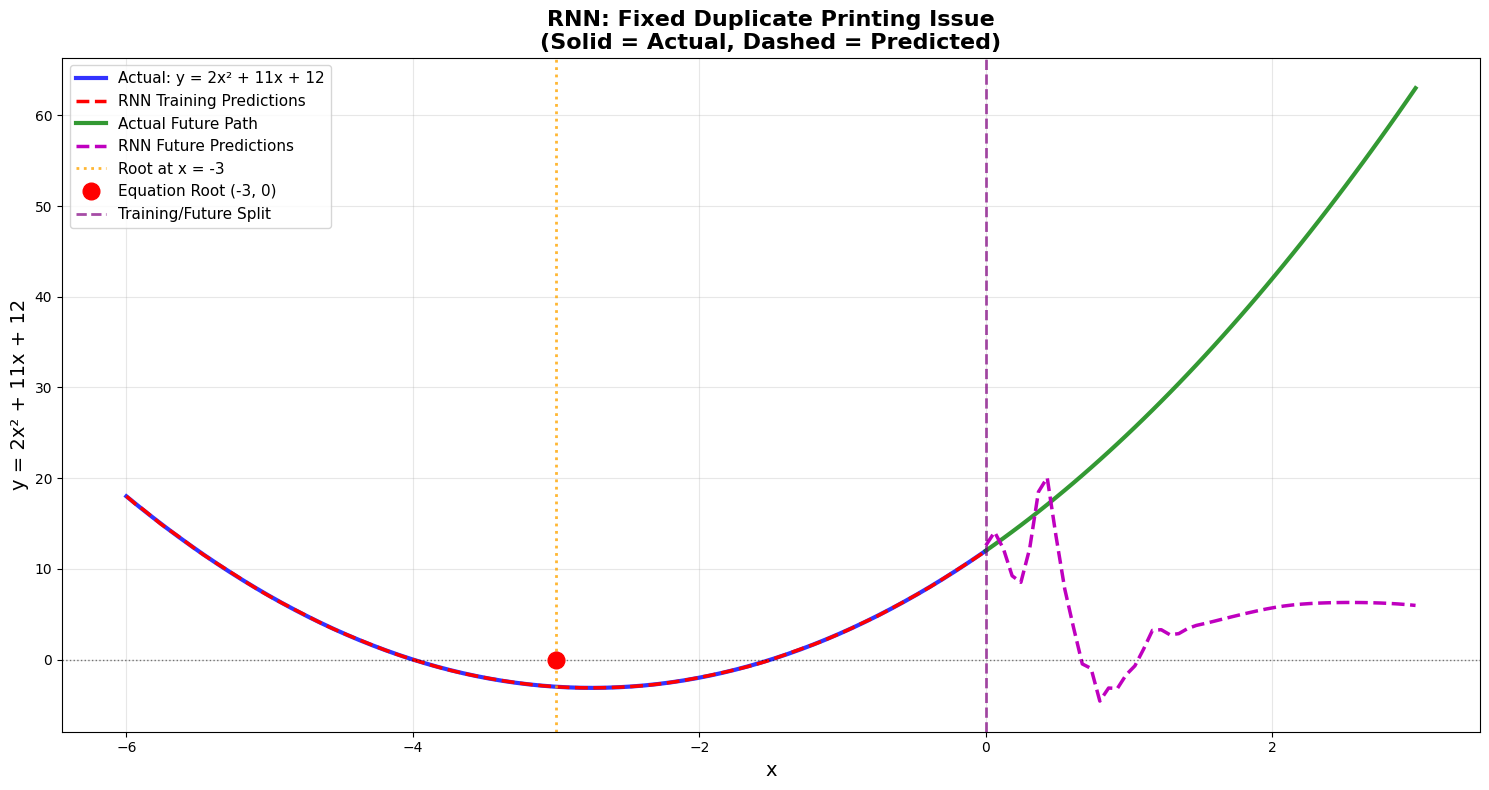


CLEAN RNN RESULTS:
Training MSE: 0.0002571739
Training MAE: 0.0125595562
Training R²:  0.9999920649
Future MSE:   1107.764750
Root Error:   1.01005025
Final Loss:   0.0001783632


In [3]:
# Testing RNN Implementation - FIXED
def test_rnn():
    print(" RNN IMPLEMENTATION TEST")
    print("=" * 50)
    
    # Generate data
    x_train = np.linspace(-6.0, 0.0, 200)
    y_train = 2*x_train**2 + 11*x_train + 12
    
    clean_rnn = RNN(hidden_size=64, learning_rate=0.001)
    final_loss = clean_rnn.train(x_train, y_train, epochs=8000)
    
    # Make predictions
    y_pred_train = clean_rnn.predict(x_train)
    
    # Future prediction
    future_x = np.linspace(0.0, 3.0, 50)
    seed_length = 40
    seed_x = x_train[-seed_length:]
    future_y_pred = clean_rnn.predict_future(seed_x, future_x)
    future_y_actual = 2*future_x**2 + 11*future_x + 12
    
    # Plot results
    plt.figure(figsize=(15, 8))
    
    plt.plot(x_train, y_train, 'b-', linewidth=3, label='Actual: y = 2x² + 11x + 12', alpha=0.8)
    plt.plot(x_train, y_pred_train, 'r--', linewidth=2.5, label='RNN Training Predictions')
    plt.plot(future_x, future_y_actual, 'g-', linewidth=3, label='Actual Future Path', alpha=0.8)
    plt.plot(future_x, future_y_pred, 'm--', linewidth=2.5, label='RNN Future Predictions')
    
    plt.axhline(y=0, color='k', linestyle=':', alpha=0.5, linewidth=1)
    plt.axvline(x=-3, color='orange', linestyle=':', alpha=0.8, linewidth=2, label='Root at x = -3')
    plt.plot(-3, 0, 'ro', markersize=12, label='Equation Root (-3, 0)', zorder=5)
    plt.axvline(x=x_train[-1], color='purple', linestyle='--', alpha=0.7, linewidth=2, label='Training/Future Split')
    
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y = 2x² + 11x + 12', fontsize=14)
    plt.title('RNN: Fixed Duplicate Printing Issue\n(Solid = Actual, Dashed = Predicted)', fontsize=16, fontweight='bold')
    plt.legend(loc='upper left', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate metrics
    train_mse = np.mean((np.array(y_pred_train) - y_train) ** 2)
    train_mae = np.mean(np.abs(np.array(y_pred_train) - y_train))
    future_mse = np.mean((np.array(future_y_pred) - future_y_actual) ** 2)
    
    # Root analysis
    root_idx = np.argmin(np.abs(y_pred_train))
    predicted_root = x_train[root_idx]
    root_error = abs(predicted_root - (-3.0))
    
    # R²
    ss_res = np.sum((y_train - y_pred_train) ** 2)
    ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    print(f"\nCLEAN RNN RESULTS:")
    print("=" * 40)
    print(f"Training MSE: {train_mse:.10f}")
    print(f"Training MAE: {train_mae:.10f}")
    print(f"Training R²:  {r_squared:.10f}")
    print(f"Future MSE:   {future_mse:.6f}")
    print(f"Root Error:   {root_error:.8f}")
    print(f"Final Loss:   {final_loss:.10f}")
    
    if root_error < 0.1:
        print("\n✅ Excellent performance with clean output!")
    
    return clean_rnn

# Run implementation with FIXED duplicate printing
clean_rnn_result = test_rnn()

In [4]:
# Minimal test to find the exact source of duplication
def test_simple_training():
    print("=== SIMPLE TRAINING TEST ===")
    
    for epoch in range(2001):
        avg_loss = 10.0 / (epoch + 1)
        
        # Adaptive learning rate test
        if epoch > 0 and epoch % 1000 == 0:
            print(f"Learning rate updated at epoch {epoch}")
            
        # Main progress print
        if epoch % 1000 == 0:
            print(f"Simple Epoch {epoch:4d}: Loss = {avg_loss:.10f}")
    
    print("Simple training completed!")

# Test this simple version
test_simple_training()

=== SIMPLE TRAINING TEST ===
Simple Epoch    0: Loss = 10.0000000000
Learning rate updated at epoch 1000
Simple Epoch 1000: Loss = 0.0099900100
Learning rate updated at epoch 2000
Simple Epoch 2000: Loss = 0.0049975012
Simple training completed!
